In [1]:
import os
import sys
project_root = "/Users/burgerhuang/Documents/ImageUtilisTools"
if project_root not in sys.path:
    sys.path.append(project_root)
from ImageUtilsTools.GeneAnalysis.CCA_analysis import CCA_permutation
import pandas as pd
import numpy as np

gene_data = "../ImageUtilsTools/GeneAnalysis/data/ahba_expression_Glasser2016LR_noHeader.csv"
gene_label = "../ImageUtilsTools/GeneAnalysis/data/genename_Glasser2016LR.csv"

gene_data = pd.read_csv(gene_data, header=None)
gene_label = np.loadtxt(gene_label, dtype=str, delimiter=",")

lh_parc, rh_parc = ['../ImageUtilsTools/GeneAnalysis/data/Glasser2016.L.32k_fs_LR.label.gii',
                    '../ImageUtilsTools/GeneAnalysis/data/Glasser2016.R.32k_fs_LR.label.gii']

# parc distance matrix files
left_dist_mat_file = '../ImageUtilsTools/GeneAnalysis/data/LeftParcelGeodesicDistmat_Glasser2016_180regions.txt'
right_dist_mat_file = '../ImageUtilsTools/GeneAnalysis/data/RightParcelGeodesicDistmat_Glasser2016_180regions.txt'

In [2]:
# 示例数据
X = gene_data.iloc[:, 9996:10005].to_numpy()
gene_label = gene_label[9996:10005]
gene_label
y = gene_data.iloc[:, 9995].to_numpy()

In [3]:
# 初始化
my_cca = CCA_permutation(
    X, 
    y, 
    gene_label,
    spin_test_method='vasa',
    parcellationLR=(lh_parc, rh_parc),
    perm=1000,
    left_dist_mat_file=left_dist_mat_file,
    right_dist_mat_file=right_dist_mat_file,
    seed=1234
)
# 计算P值
my_cca.permutative_P_statistic()

Negative correlation,
Canonical Correlation Coefficient: -0.8488075568971382
Canonical Correlation Coefficient: 0.8488075568971382


100%|██████████| 1000/1000 [00:00<00:00, 2564.98it/s]

p-value of CCA: 0.0


0.0

In [4]:
# 计算bootstrap后的变量权重
my_cca.compute_bootstrap()

100%|██████████| 1000/1000 [00:00<00:00, 2422.60it/s]


,Gene,Z-score
0,PLXNA1,4.576200
1,PLXNA3,3.475130
2,PLXNB3,1.961170
3,PLXNA4,1.491761
4,PLXNA2,1.247513
5,PLXNB2,-1.122794
6,PLXNB1,-3.602489
7,PLXDC2,-6.668815
8,PLXNC1,-20.769268


In [5]:
# 原始权重
my_cca.weights

array([[-0.47954022],
       [ 0.21890033],
       [ 0.06428153],
       [ 0.174974  ],
       [ 0.07031373],
       [-0.20216402],
       [-0.06328411],
       [ 0.09990864],
       [-0.79219624]])

In [6]:
gene_label

array(['PLXDC2', 'PLXNA1', 'PLXNA2', 'PLXNA3', 'PLXNA4', 'PLXNB1',
       'PLXNB2', 'PLXNB3', 'PLXNC1'], dtype='<U25')

Text(0.5, 1.0, 'PLXNC1')

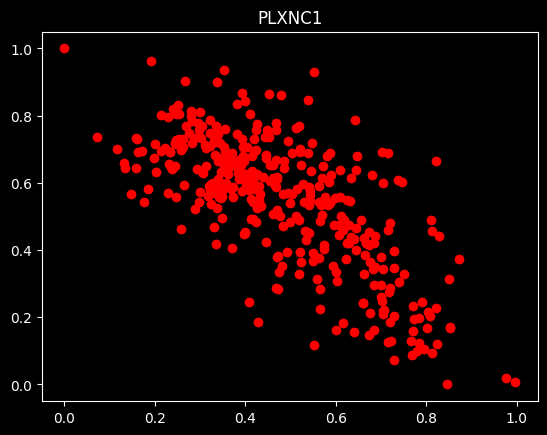

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 8], y=y, c='r')
plt.title(gene_label[8])

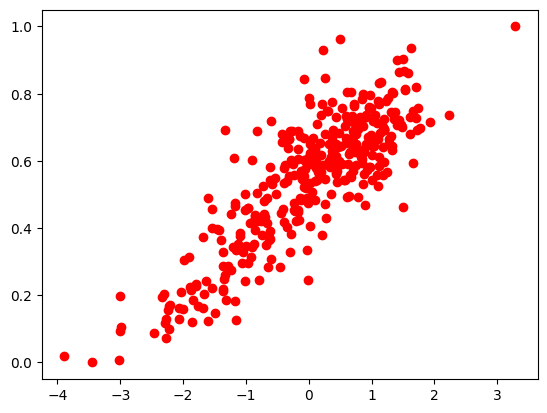

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x=my_cca.X_c, y=y, c='r')

In [13]:
my_cca.x_score

array([[-3.63907322e-01],
       [-1.65594616e+00],
       [-1.09064371e-01],
       [-8.65442576e-01],
       [-7.85659869e-01],
       [-1.11162371e+00],
       [-1.01334187e+00],
       [-1.31455003e+00],
       [-1.49065139e+00],
       [-1.20361524e+00],
       [-9.78173901e-01],
       [-1.76841069e+00],
       [-3.28635942e+00],
       [-7.44866554e-01],
       [ 9.16999051e-02],
       [-1.30202855e-02],
       [-3.27037630e-01],
       [ 1.84447660e-01],
       [-8.89873686e-01],
       [-2.34444994e-01],
       [-7.57395049e-01],
       [ 4.25534907e-01],
       [-7.35341645e-01],
       [-9.56972015e-01],
       [-5.84947682e-01],
       [-1.11128695e-01],
       [-2.66790990e-01],
       [ 2.75704794e-01],
       [-7.54481479e-01],
       [-2.02938634e-01],
       [ 1.32727126e+00],
       [-1.53466325e+00],
       [-3.63394572e-01],
       [-9.46039714e-01],
       [-1.53615833e+00],
       [ 5.16829651e-02],
       [ 2.90198890e-01],
       [-3.58510013e-01],
       [ 1.2

In [15]:
my_cca.X_c

array([[ 3.63907322e-01],
       [ 1.65594616e+00],
       [ 1.09064371e-01],
       [ 8.65442576e-01],
       [ 7.85659869e-01],
       [ 1.11162371e+00],
       [ 1.01334187e+00],
       [ 1.31455003e+00],
       [ 1.49065139e+00],
       [ 1.20361524e+00],
       [ 9.78173901e-01],
       [ 1.76841069e+00],
       [ 3.28635942e+00],
       [ 7.44866554e-01],
       [-9.16999051e-02],
       [ 1.30202855e-02],
       [ 3.27037630e-01],
       [-1.84447660e-01],
       [ 8.89873686e-01],
       [ 2.34444994e-01],
       [ 7.57395049e-01],
       [-4.25534907e-01],
       [ 7.35341645e-01],
       [ 9.56972015e-01],
       [ 5.84947682e-01],
       [ 1.11128695e-01],
       [ 2.66790990e-01],
       [-2.75704794e-01],
       [ 7.54481479e-01],
       [ 2.02938634e-01],
       [-1.32727126e+00],
       [ 1.53466325e+00],
       [ 3.63394572e-01],
       [ 9.46039714e-01],
       [ 1.53615833e+00],
       [-5.16829651e-02],
       [-2.90198890e-01],
       [ 3.58510013e-01],
       [-1.2

In [11]:
print(my_cca.negative)

True
